<a href="https://colab.research.google.com/github/ArnavBhatia68/MAT-421-HW/blob/main/ModuleD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW5 – Arnav Bhatia

Course: MAT421

Date : 02/12


1.1 **Linear Space**

A linear (vector) space over a field (e.g. R) is a set of elements (vectors) that can be added together and scaled by scalars (real numbers) in a way that follows certain axioms (commutativity, associativity, distributivity, etc.).


Example: Creating Vectors and Matrices in Python

In [8]:


import numpy as np

# A simple 1D array = vector
v1 = np.array([1, 3, 5])
print("Vector v1 =", v1)

# A 2D array = matrix
M1 = np.array([[1, 2, 3],
               [4, 5, 6],
               [7, 8, 9]])
print("Matrix M1:\n", M1)

# Basic operations: addition, scalar multiplication
v2 = np.array([2, 4, 6])
v_sum = v1 + v2
v_scaled = 2 * v1
print("v1 + v2 =", v_sum)
print("2 * v1 =", v_scaled)


Vector v1 = [1 3 5]
Matrix M1:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
v1 + v2 = [ 3  7 11]
2 * v1 = [ 2  6 10]


2. **Orthogonality**

Two vectors u and v in R^n are orthogonal (perpendicular) if their dot product is 0.
More broadly, we can speak of orthogonal matrices or transformations.


In [7]:


v3 = np.array([1, 0, 0])
v4 = np.array([0, 2, 0])

dot_v3_v4 = np.dot(v3, v4)
print("dot(v3, v4) =", dot_v3_v4)

if dot_v3_v4 == 0:
    print("v3 and v4 are orthogonal.")
else:
    print("v3 and v4 are NOT orthogonal.")


dot(v3, v4) = 0
v3 and v4 are orthogonal.


3. **Eigenvalues and Eigenvectors**

Given a square matrix A, an eigenvalue λ and eigenvector x satisfy Ax = λx.
In NumPy, we can use numpy.linalg.eig.


Example

In [6]:


from numpy.linalg import eig

# Define a 3x3 matrix
A = np.array([[2, 0, 0],
              [0, 3, 0],
              [0, 0, 4]])

# Compute eigenvalues (w) and eigenvectors (v)
w, v = eig(A)

print("Eigenvalues:", w)
print("Eigenvectors:\n", v)


Eigenvalues: [2. 3. 4.]
Eigenvectors:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


We see that the eigenvalues are {2, 3, 4}.
The corresponding eigenvectors are typically the standard basis if the matrix is diagonal like this.


**Linear Regression**

Concept Explanation

Linear regression attempts to fit a line or polynomial (in general) to data
(x_i, y_i) by minimizing the sum of squared errors (residuals).
The simplest form is a line y = β_0 + β_1 x.
For polynomial fitting, we can use a design matrix with terms x, x^2, ….


Coefficients (Quadratic): [ 0.32636344 -0.51788256  3.35036096]


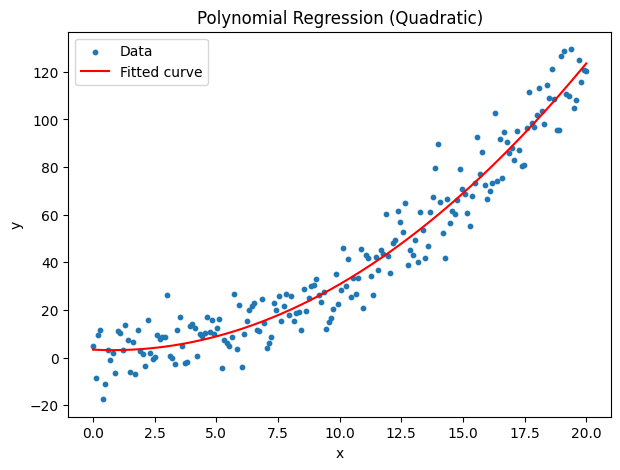

In [5]:


import matplotlib.pyplot as plt

# Generate synthetic data
x = np.linspace(0, 20, 200)
# True model: y = 2 + 0.3*x^2 + some noise
rng = np.random.default_rng(42)
noise = rng.normal(loc=0, scale=10, size=len(x))
y = 2 + 0.3*(x**2) + noise

# Reshape y to be a column vector for matrix ops
y = y[:, np.newaxis]

# Create a design matrix for quadratic fit: [x^2, x, 1]
# A will be shape (N, 3)
A = np.vstack([x**2, x, np.ones(len(x))]).T

# Solve for coefficients: alpha = (A^T A)^(-1) A^T y
alpha = np.linalg.inv(A.T @ A) @ (A.T @ y)

# alpha will contain [coef_x^2, coef_x, intercept]
print("Coefficients (Quadratic):", alpha.ravel())

# Plot the data vs. fitted curve
y_fit = alpha[0]*x**2 + alpha[1]*x + alpha[2]

plt.figure(figsize=(7,5))
plt.scatter(x, y, s=10, label="Data")
plt.plot(x, y_fit, 'r', label="Fitted curve")
plt.legend()
plt.title("Polynomial Regression (Quadratic)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


Interpretation:

We generated data from y = 2 + 0.3x^2 plus noise.
Using matrix operations, we solved for a quadratic approximation.
We can see how close the red fit is to the actual data points.

